Zbiór danych zawiera historyczne ceny sprzedaży samochodów na aukcjach, zebrane z zewnętrznych źródeł internetowych. Został zebrany w 2015 roku.

Zbiór danych zawiera następujące kolumny:
- year - rok produkcji pojazdu;
- make - marka pojazdu (np. Toyota, Ford);
- model - model pojazdu (np. Corolla, Mustang);
- trim - wersja wyposażenia pojazdu (np. SE, Base);
- body - rodzaj nadwozia pojazdu (np. sedan, SUV);
- transmission - rodzaj skrzyni biegów (np. automatyczna, manualna);
- vin - numer identyfikacyjny pojazdu (VIN);
- state - stan (lokalizacja geograficzna) w USA, gdzie odbyła się sprzedaż;
- condition - stan pojazdu oceniany w skali od 1 do 5, gdzie wyższe wartości oznaczają lepszy stan techniczny (zmienna ciągła);
- odometer - przebieg pojazdu w milach;
- color - kolor karoserii pojazdu;
- interior - kolor wnętrza pojazdu;
- seller - nazwa lub identyfikator sprzedającego pojazd;
- mmr - wartość pojazdu według Manheim Market Report (MMR), używana jako wskaźnik wartości rynkowej;
- sellingprice - rzeczywista cena sprzedaży pojazdu na aukcji;
- saledate - data sprzedaży pojazdu.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('car_prices.csv', on_bad_lines='skip')
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [100]:
df.shape

(558811, 16)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [102]:
missing_values = df.isnull().sum()

print(missing_values)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64
year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64


In [103]:
nums = df.select_dtypes(exclude=['object'])
nums.describe(percentiles=(.25, .75, .90, .95, .98))

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
90%,2014.000000,4.600000,142760.400000,25500.000000,25500.000000
95%,2014.000000,4.800000,170059.000000,30600.000000,30600.000000
98%,2014.000000,5.000000,202596.680000,38500.000000,38500.000000


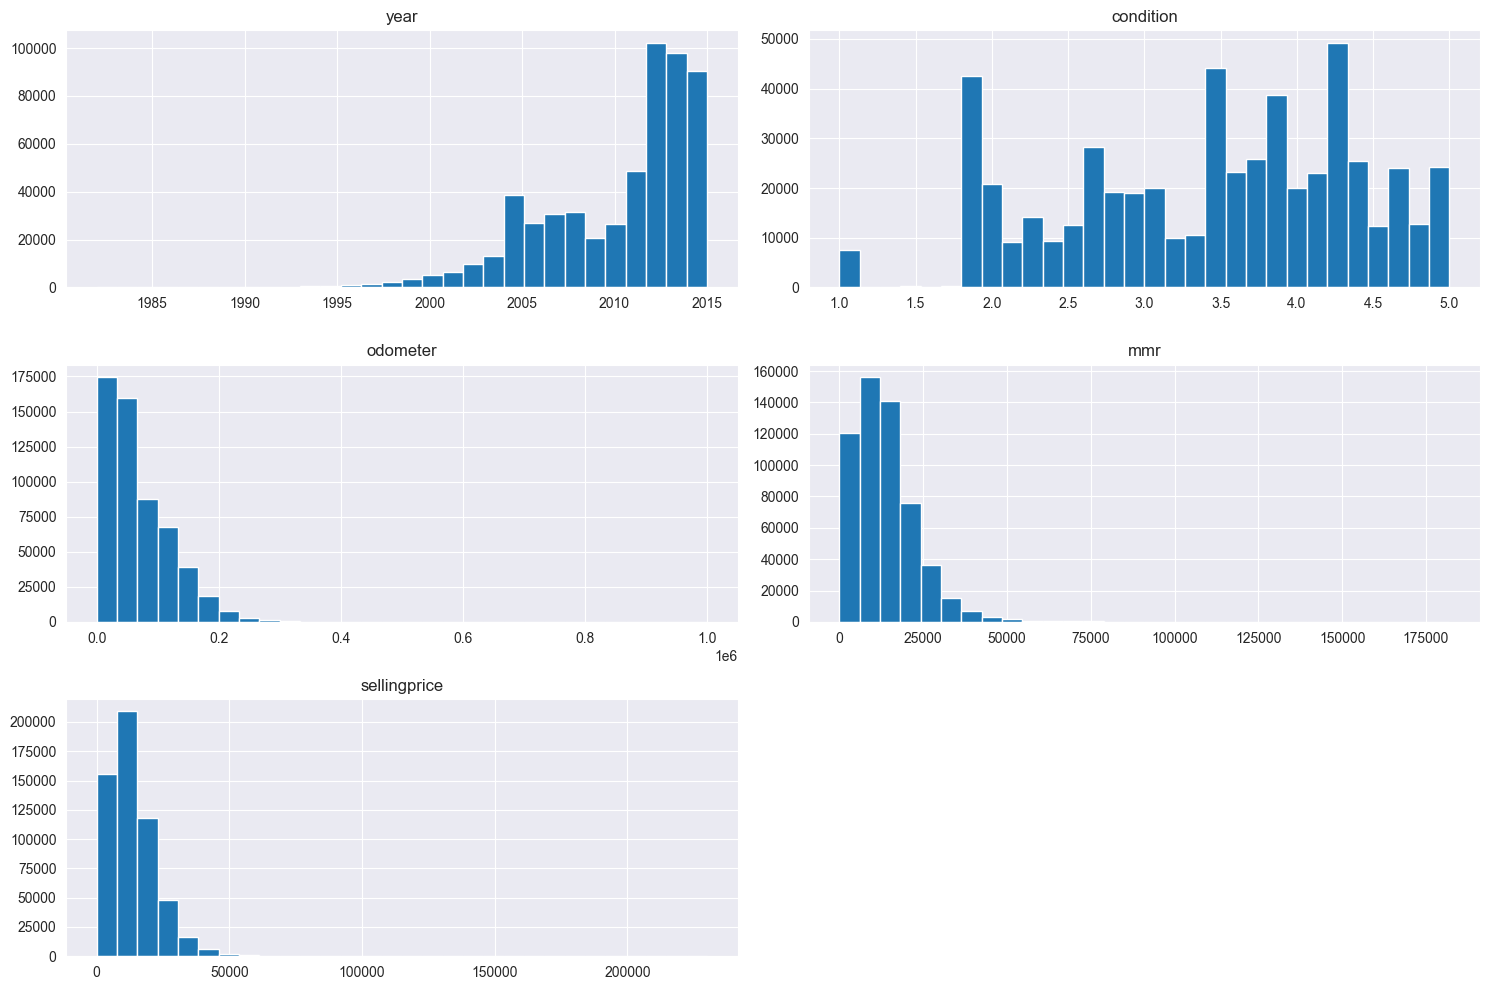

In [104]:
nums.hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

Można spróbować wykonać przekształcenie logarytmiczne żeby te histogramy nie rozciągały się tak w prawo

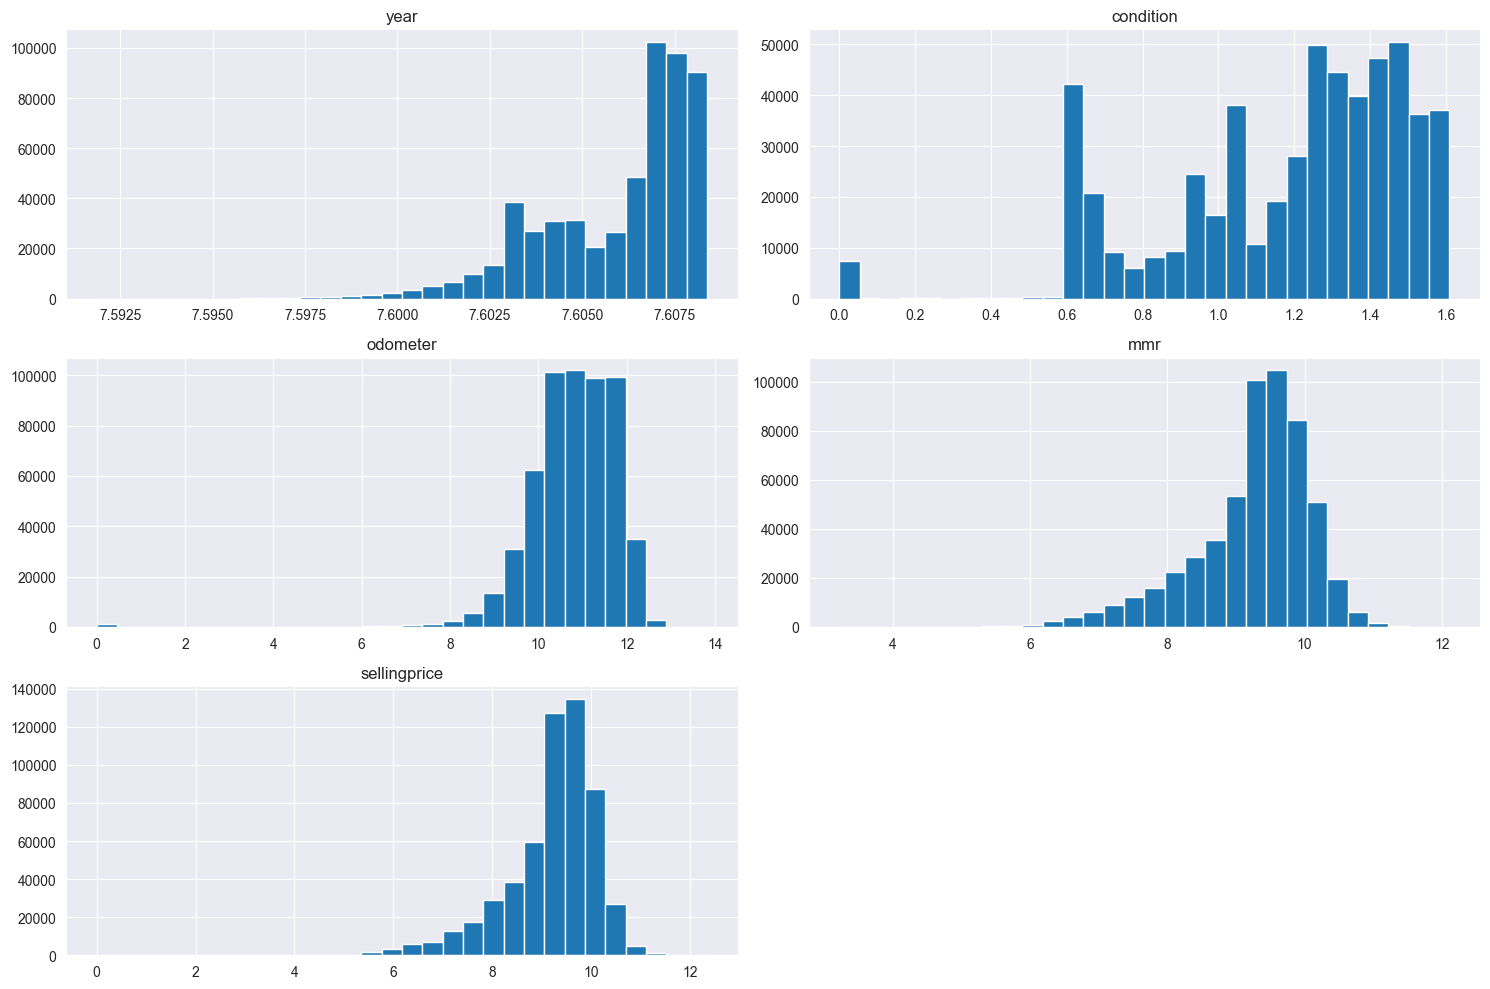

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Tworzenie histogramów na przekształconych logarytmicznie danych, ale tylko do wizualizacji
nums_log = np.log(nums)

nums_log.hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

In [106]:
non_nums = df.select_dtypes(include=['object'])
non_nums.describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


In [107]:
import seaborn as sns

def show_boxplot(data, title):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data)
    plt.title(title)
    plt.grid()
    plt.show()

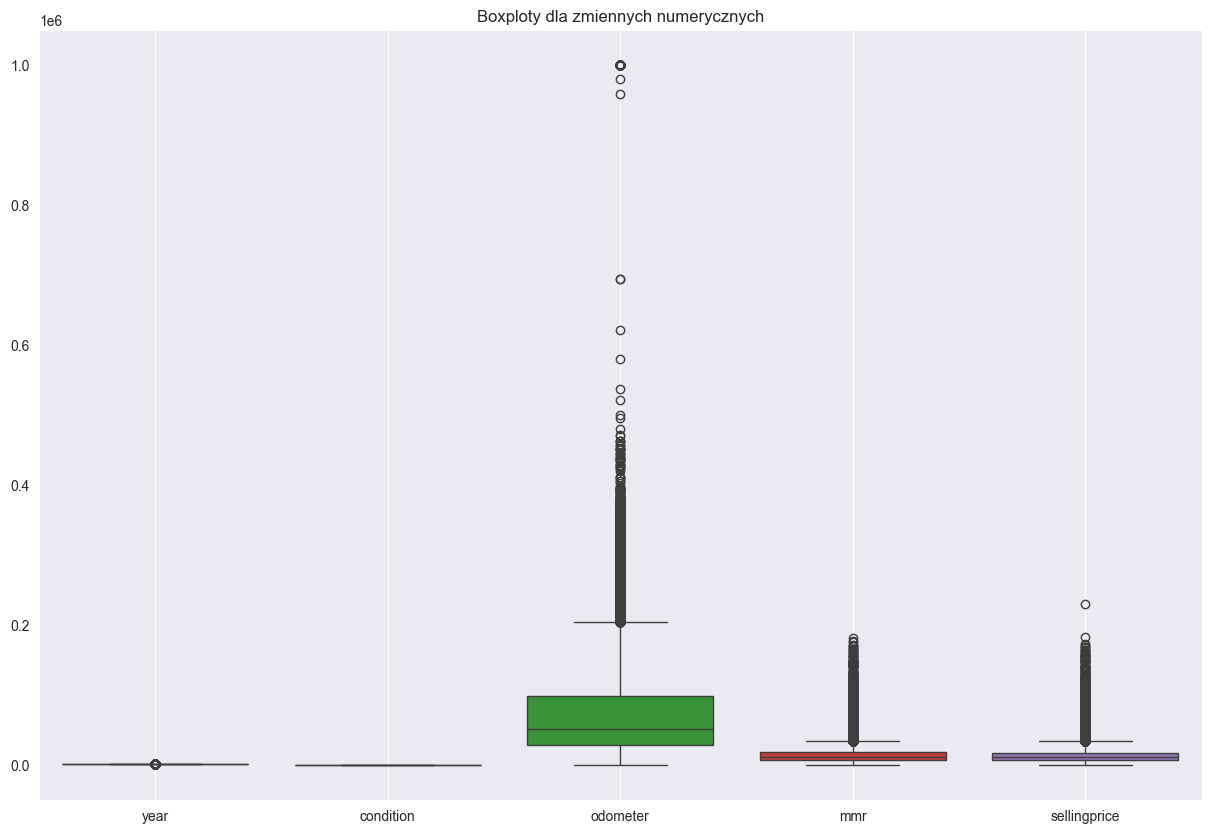

In [108]:
show_boxplot(nums, 'Boxploty dla zmiennych numerycznych')

Na powyższym wykresie przedstawiono boxploty dla zmiennych numerycznych, jednak ze względu na dużą różnicę w wartościach pomiędzy zmiennymi, szczegóły niektórych cech są trudne do dostrzeżenia. Aby lepiej zobrazować rozkład wartości, w tym wartości odstające, zostaną przedstawione oddzielne boxploty dla każdej z cech numerycznych. Dodatkowo, wykresy te zostaną wygenerowane zarówno z uwzględnieniem danych odstających, jak i bez nich, aby zapewnić pełniejszą analizę danych.

In [109]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [110]:
num_columns = ['sellingprice', 'odometer', 'mmr', 'year', 'condition']

# Usuwanie wartości odstających dla każdej zmiennej numerycznej
nums_clean = nums.copy()
for column in num_columns:
    nums_clean = remove_outliers(nums_clean, column)

In [111]:
def show_separate_boxplot(data,data_clean,num_columns):
    for column in num_columns:    
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
        sns.boxplot(y=data[column], ax=axes[0])
        axes[0].set_title(f'Boxplot dla cechy: {column} (przed usunięciem wartości odstających)')
    
        sns.boxplot(y=data_clean[column], ax=axes[1])
        axes[1].set_title(f'Boxplot dla cechy: {column} (po usunięciu wartości odstających)')
    
        plt.tight_layout()
        plt.show()

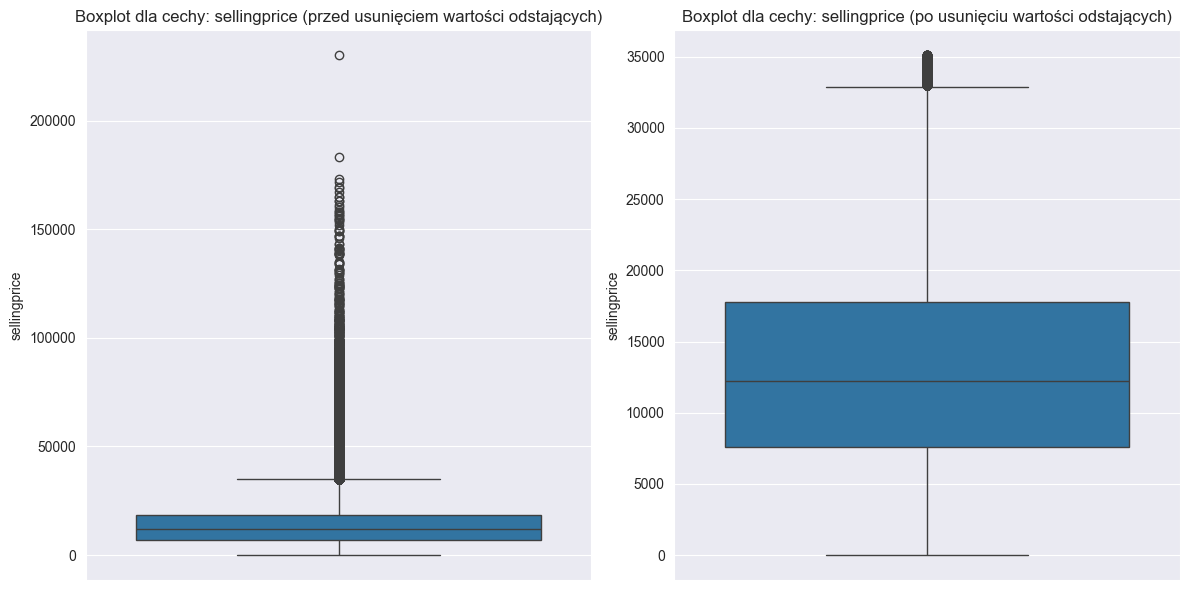

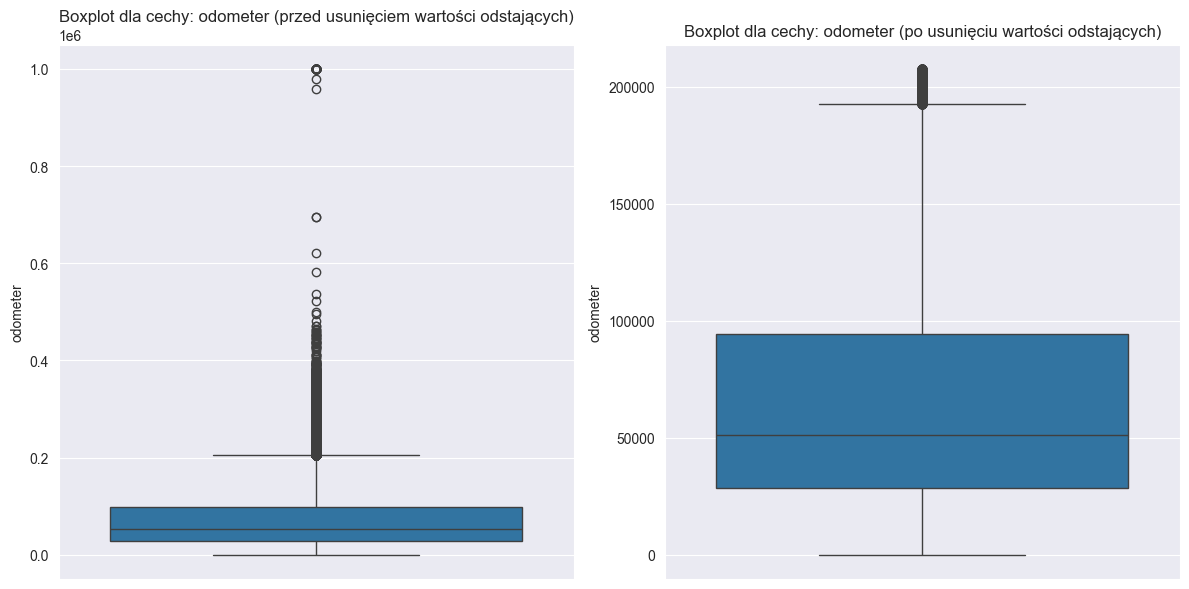

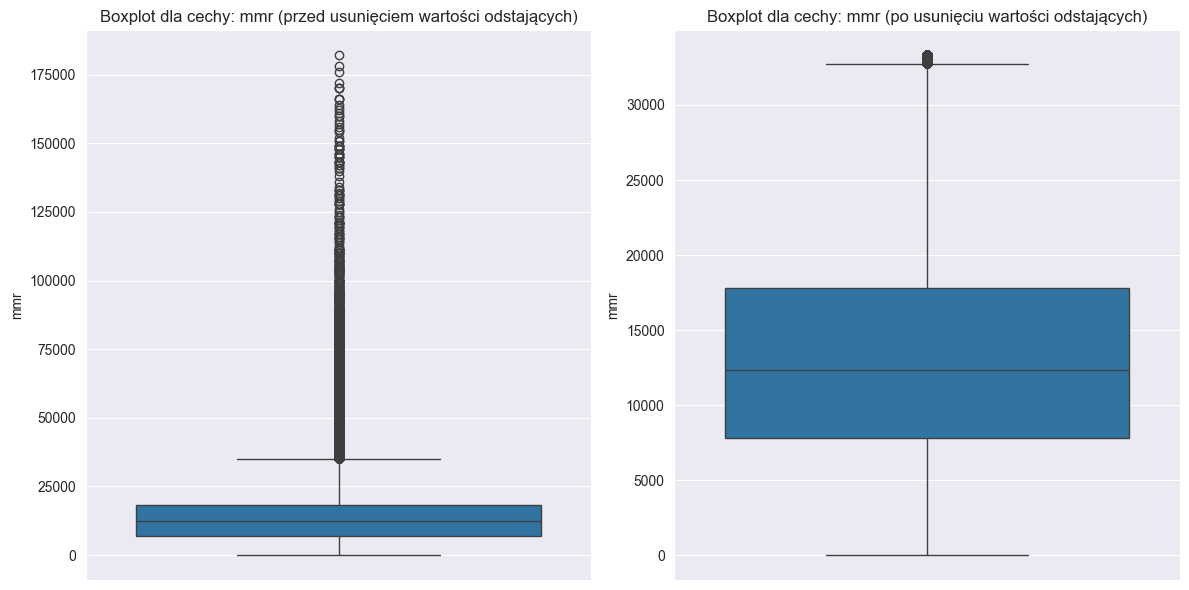

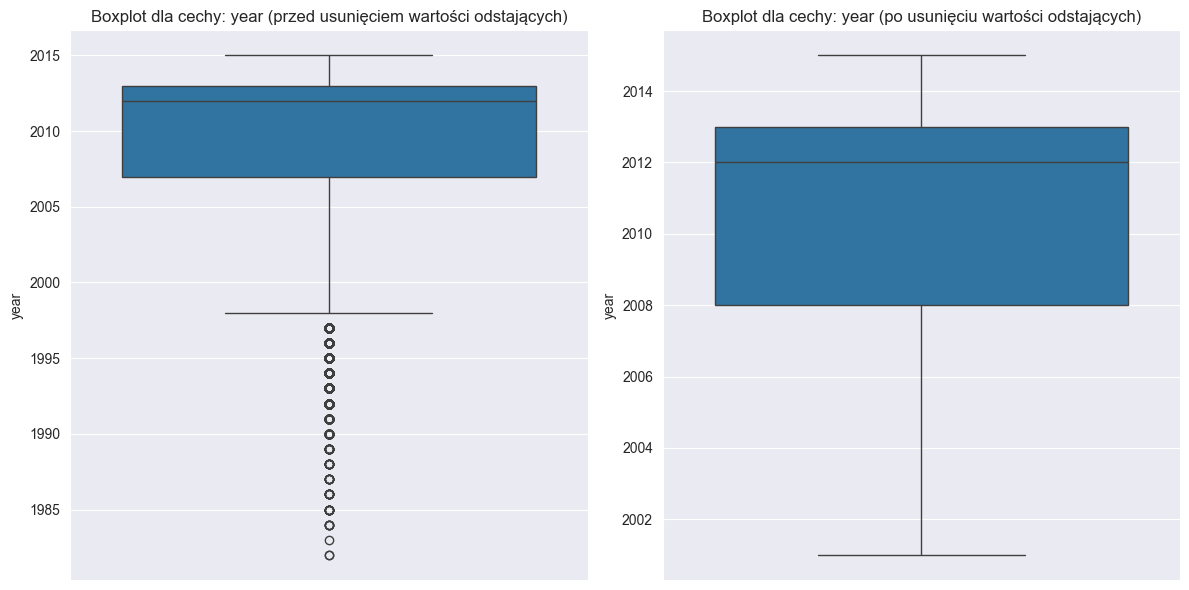

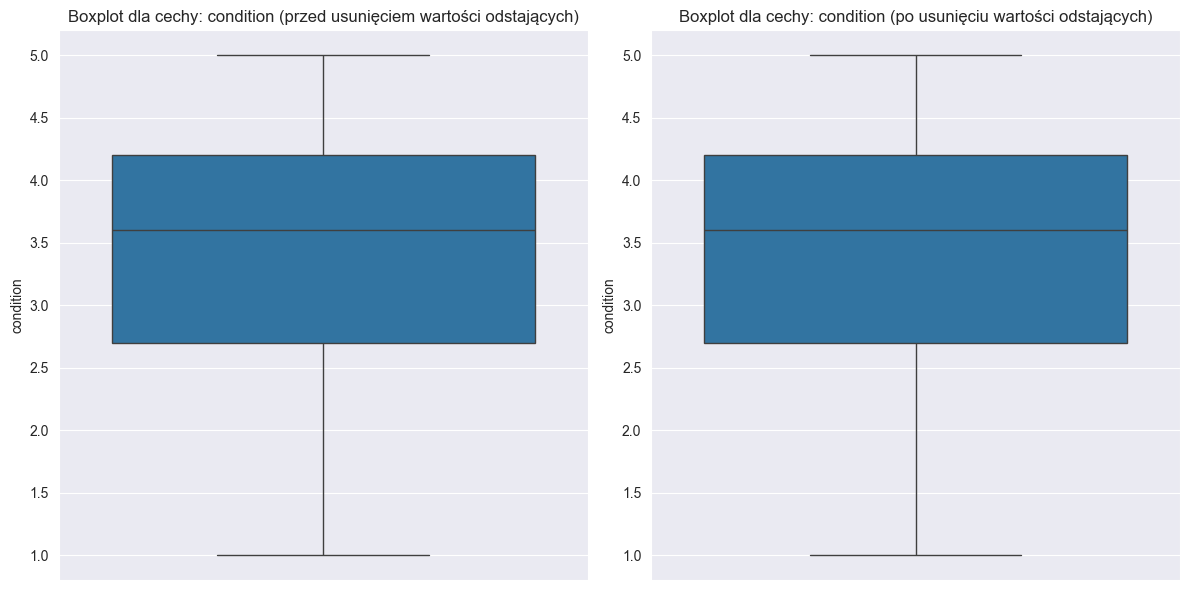

In [112]:
show_separate_boxplot(nums,nums_clean,num_columns)

Wartości odstające mają największy wpływ na zmienne takie jak cena sprzedaży (sellingprice), przebieg (odometer) i wartość rynkowa (mmr), które charakteryzują się nielicznymi, ale bardzo skrajnymi wartościami odstającymi. Po ich usunięciu uzyskujemy bardziej klarowny obraz typowego rozkładu danych, co pozwala lepiej zrozumieć, jakie są rzeczywiste wartości dominujące w zbiorze danych.

W przypadku zmiennych rok produkcji (year) i stan techniczny (condition), wartości odstające mają mniejszy wpływ. Boxplot dla stanu technicznego jest bardzo jednorodny, co wskazuje, że ta zmienna nie zawiera wielu ekstremalnych wartości, a typowy stan techniczny pojazdów waha się od 2.5 do 4.5.

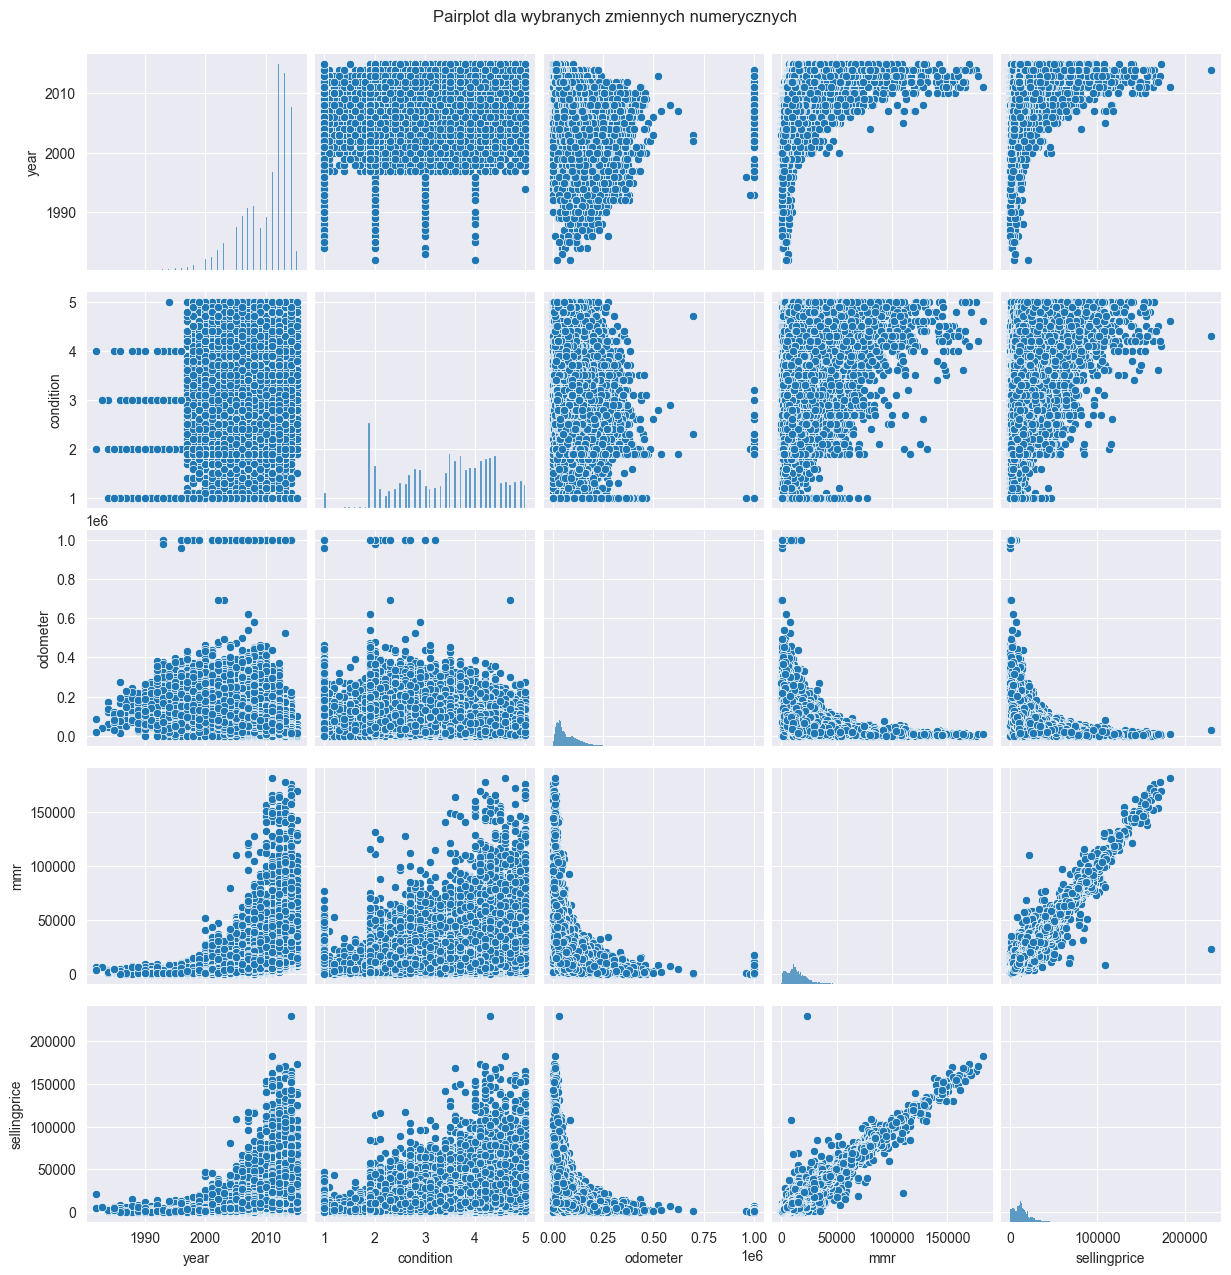

In [113]:
sns.pairplot(nums)
plt.suptitle('Pairplot dla wybranych zmiennych numerycznych', y=1.02)
plt.show()

Patrząc na pairplot, widzimy wyraźne zależności między niektórymi zmiennymi (np. cena sprzedaży a rok produkcji, przebieg czy wartość rynkowa). Aby lepiej zrozumieć, jak silne są te zależności, warto obliczyć współczynniki korelacji dla tych zmiennych. Pozwoli to na dokładniejszą ocenę siły tych relacji.

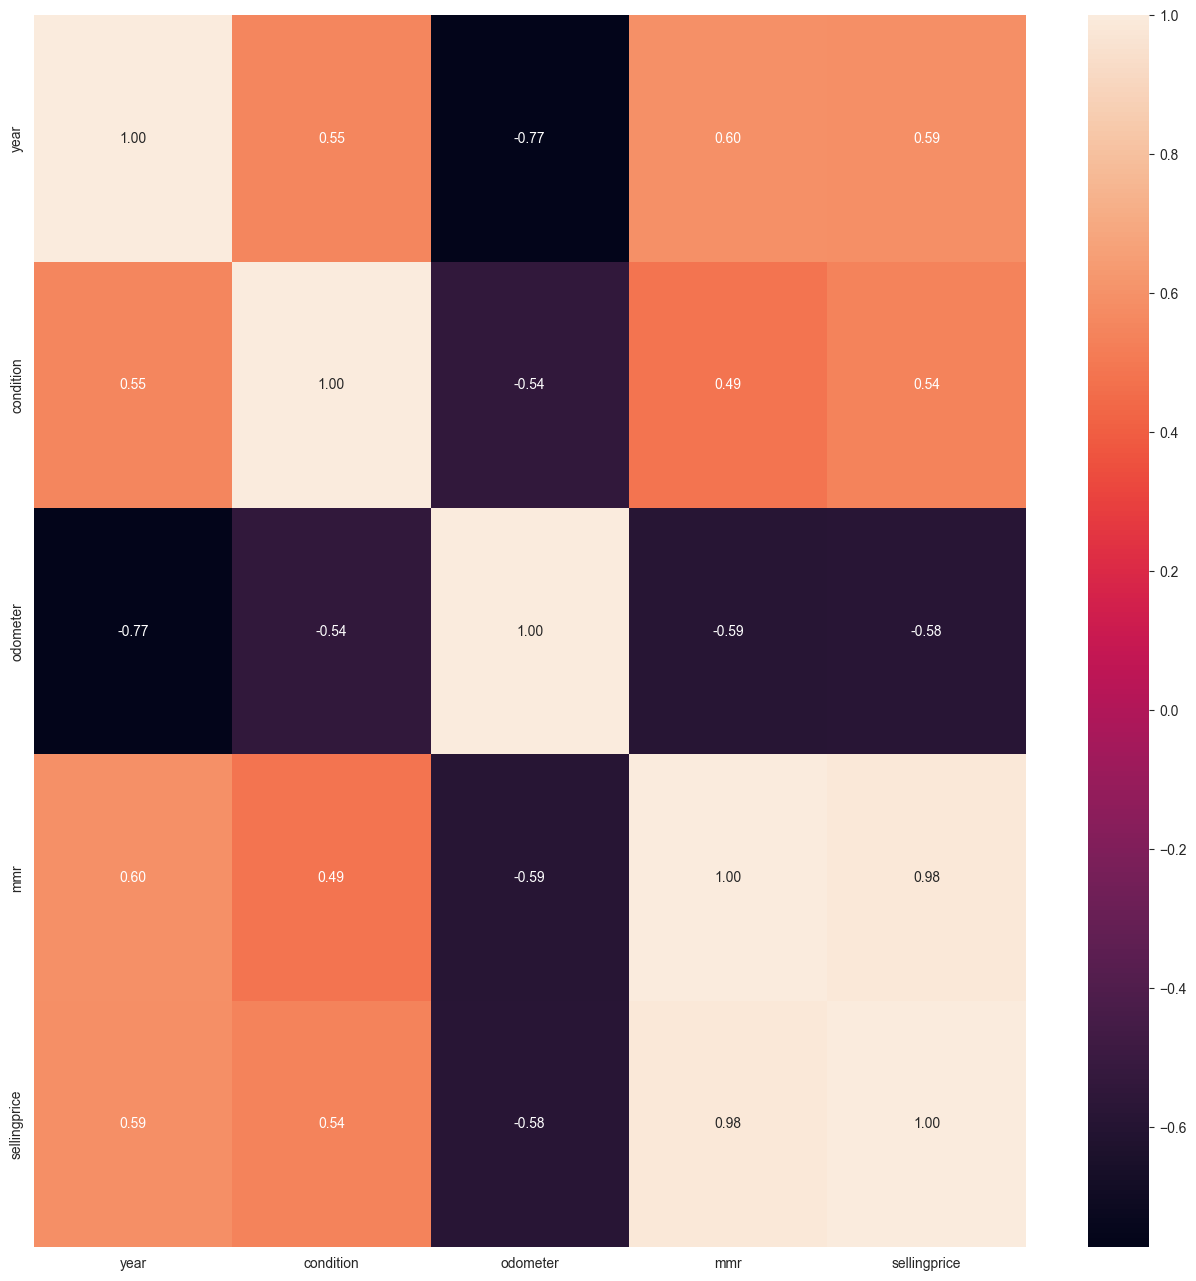

In [114]:
nums_corr = nums.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(nums_corr, annot=True, fmt='.2f', ax=ax)
plt.show()

Rok produkcji (year) ma silną dodatnią korelację z ceną sprzedaży (0.59), co oznacza, że nowsze samochody zazwyczaj sprzedają się za wyższą cenę.
Stan techniczny (condition) ma dodatnią korelację z ceną sprzedaży (0.54), co sugeruje, że samochody w lepszym stanie są droższe.
Przebieg (odometer) wykazuje silną ujemną korelację z ceną sprzedaży (-0.58), co oznacza, że większy przebieg zmniejsza wartość samochodu.
MMR (wartość rynkowa) ma bardzo silną dodatnią korelację z ceną sprzedaży (0.98), co wskazuje, że wartość rynkowa samochodu dobrze prognozuje jego cenę na aukcji.

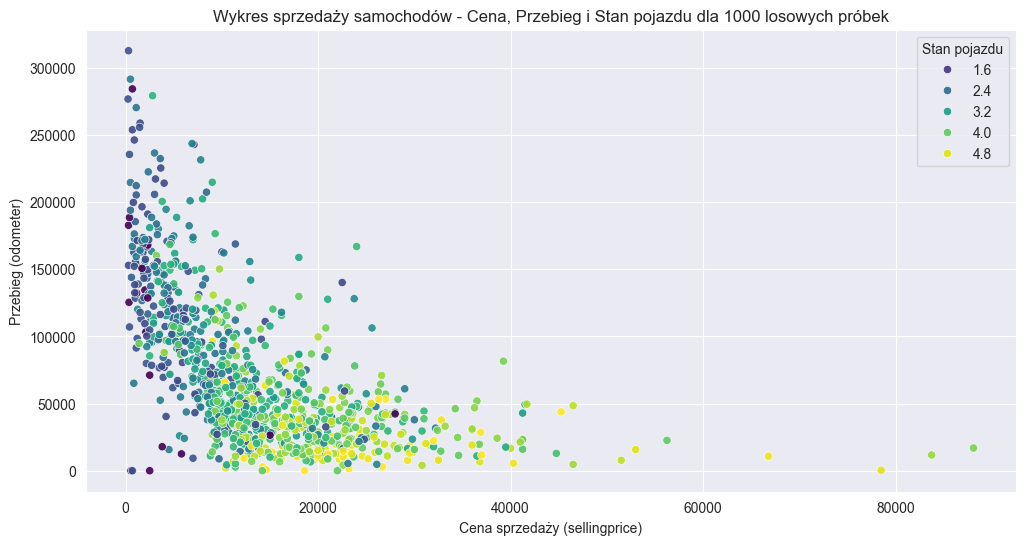

In [115]:
df_sample = df.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sellingprice', y='odometer', 
                hue='condition', 
                data=df_sample, palette='viridis', sizes=(20, 200), alpha=0.9)

plt.title('Wykres sprzedaży samochodów - Cena, Przebieg i Stan pojazdu dla 1000 losowych próbek')
plt.xlabel('Cena sprzedaży (sellingprice)')
plt.ylabel('Przebieg (odometer)')
plt.legend(title='Stan pojazdu')
plt.show()

Na powyższym wykresie zbadano zależność między przebiegiem pojazdów a ceną sprzedaży, uwzględniając jednocześnie ich stan techniczny. Zauważalna jest silna ujemna zależność – samochody z większym przebiegiem są zazwyczaj tańsze. Lepszy stan techniczny pojazdu wpływa pozytywnie na cenę sprzedaży, co pozwala niektórym pojazdom osiągnąć wyższe ceny, nawet przy relatywnie dużym przebiegu. Najwyższe ceny uzyskują samochody w najlepszym stanie, podczas gdy pojazdy w najgorszym stanie sprzedają się za niższe kwoty, niezależnie od przebiegu.

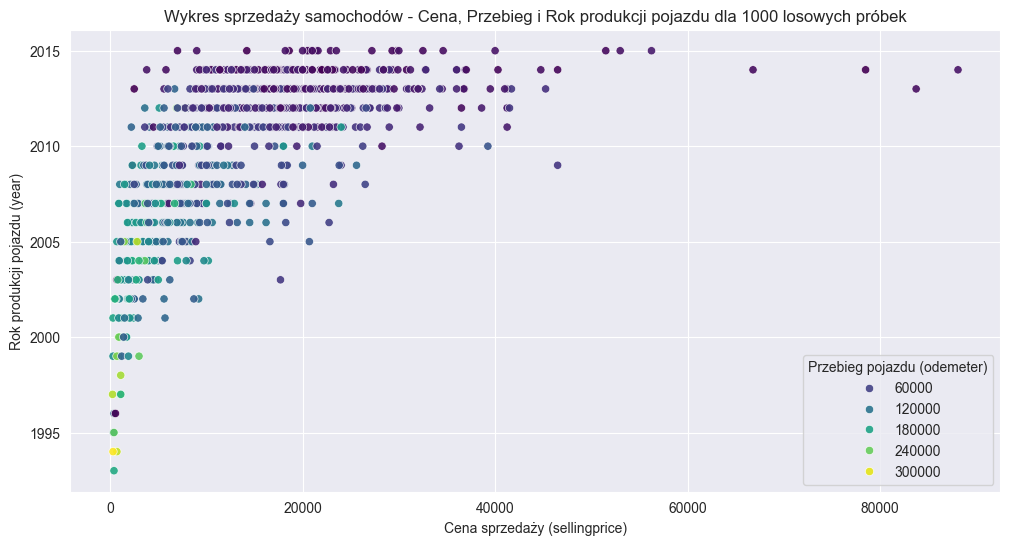

In [116]:
df_sample = df.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sellingprice', y='year', 
                hue='odometer', 
                data=df_sample, palette='viridis', sizes=(20, 200), alpha=0.9)

plt.title('Wykres sprzedaży samochodów - Cena, Przebieg i Rok produkcji pojazdu dla 1000 losowych próbek')
plt.xlabel('Cena sprzedaży (sellingprice)')
plt.ylabel('Rok produkcji pojazdu (year)')
plt.legend(title='Przebieg pojazdu (odemeter)')
plt.show()

Wykres przedstawia zależność między rokiem produkcji a ceną sprzedaży samochodów, uwzględniając jednocześnie ich przebieg. Zauważalna jest wyraźna tendencja – nowsze samochody (z lat 2010–2015) osiągają wyższe ceny, podczas gdy starsze pojazdy (sprzed 2005 roku) sprzedają się za znacznie niższe kwoty. Przebieg również ma istotny wpływ – samochody z mniejszym przebiegiem mają tendencję do wyższych cen, zwłaszcza w przypadku nowszych roczników. Samochody z większym przebiegiem, niezależnie od roku produkcji, zazwyczaj mają niższą wartość.

Liczba sprzedanych pojazdów w poszczególnych stanach:
state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64


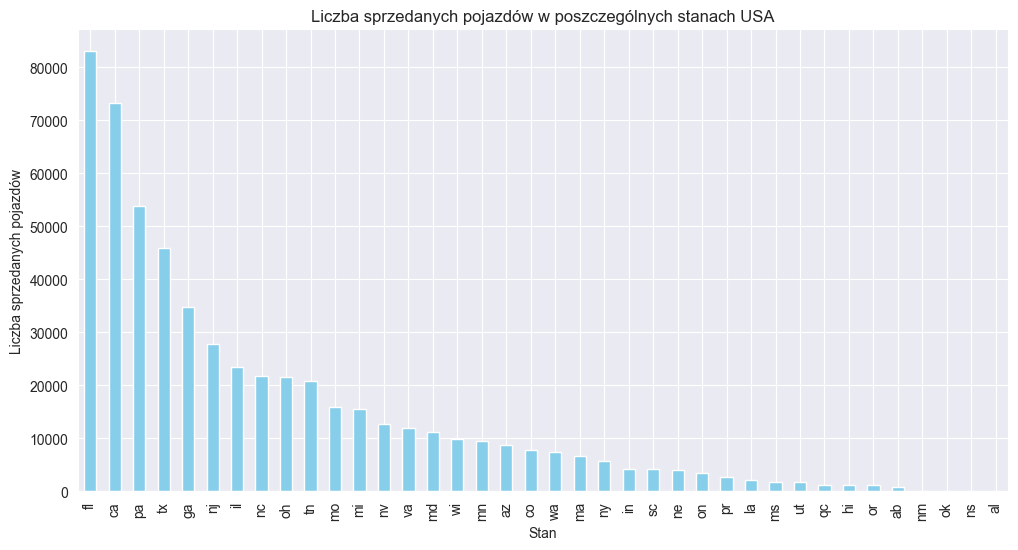

In [117]:
sales_by_state = df['state'].value_counts()
print("Liczba sprzedanych pojazdów w poszczególnych stanach:")
print(sales_by_state)

plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Liczba sprzedanych pojazdów w poszczególnych stanach USA')
plt.xlabel('Stan')
plt.ylabel('Liczba sprzedanych pojazdów')
plt.show()

 Największą liczbę sprzedanych pojazdów odnotowano w stanach Floryda (FL) oraz Kalifornia (CA). Te dwa stany zdecydowanie wyróżnią się jako liderzy. W czołówce są także Teksas (TX), Pensylwania (PA) oraz Georgia (GA).

Top 10 najczęściej sprzedawanych marek samochodów:
make
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: sellingprice, dtype: int64


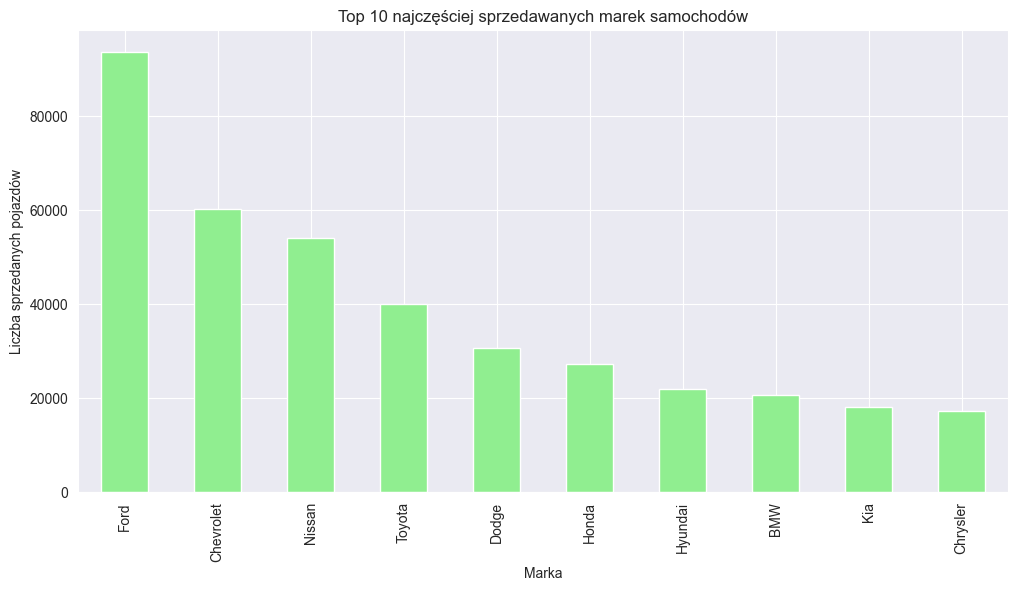

In [118]:
sales_by_make = df.groupby('make')['sellingprice'].count().sort_values(ascending=False).head(10)
print("Top 10 najczęściej sprzedawanych marek samochodów:")
print(sales_by_make)

plt.figure(figsize=(12, 6))
sales_by_make.plot(kind='bar', color='lightgreen')
plt.title('Top 10 najczęściej sprzedawanych marek samochodów')
plt.xlabel('Marka')
plt.ylabel('Liczba sprzedanych pojazdów')
plt.show()


Ford zdecydowanie dominuje jako najczęściej sprzedawana marka, z wyraźną przewagą nad Chevroletem oraz Nissanem. Toyota oraz Dodge zamykają czołową piątkę. Wynik ten może odzwierciedlać popularność tych marek na rynku amerykańskim, gdzie dominują pojazdy amerykańskie i azjatyckie

Liczba sprzedanych pojazdów w poszczególnych latach produkcji:
year
1982         2
1983         1
1984         5
1985        10
1986        11
1987         8
1988        11
1989        20
1990        49
1991        67
1992       132
1993       205
1994       392
1995       711
1996       851
1997      1546
1998      2149
1999      3363
2000      5227
2001      6468
2002      9715
2003     13281
2004     17342
2005     21394
2006     26913
2007     30845
2008     31502
2009     20594
2010     26485
2011     48548
2012    102315
2013     98168
2014     81070
2015      9411
Name: count, dtype: int64


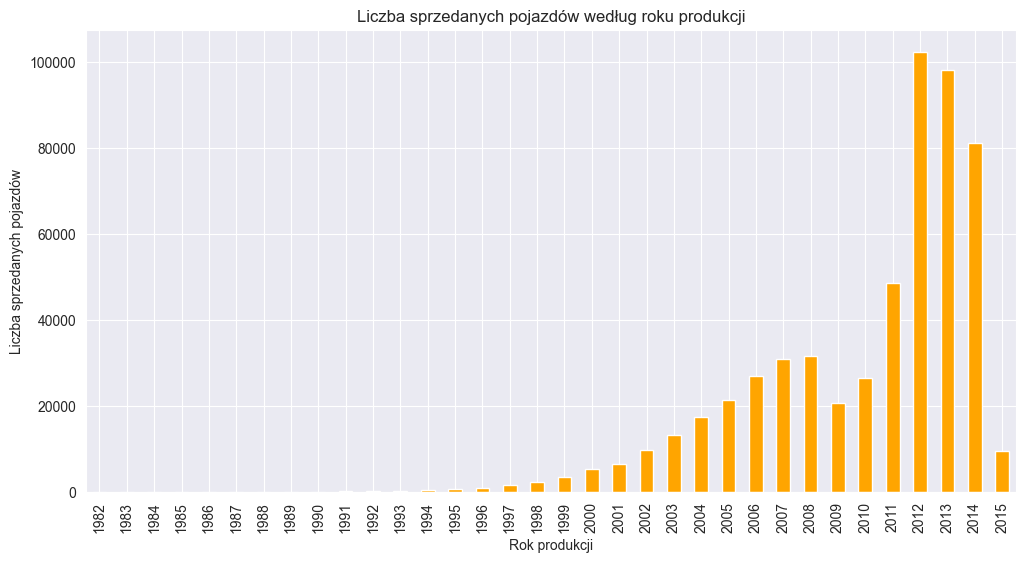

In [119]:
sales_by_year = df['year'].value_counts().sort_index()
print("Liczba sprzedanych pojazdów w poszczególnych latach produkcji:")
print(sales_by_year)

plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='bar', color='orange')
plt.title('Liczba sprzedanych pojazdów według roku produkcji')
plt.xlabel('Rok produkcji')
plt.ylabel('Liczba sprzedanych pojazdów')
plt.show()

Największa liczba sprzedanych pojazdów pochodzi z lat 2011-2014, co sugeruje, że rynek używanych samochodów obejmuje głównie nowsze modele, które mają jeszcze sporo lat eksploatacji przed sobą. Starsze roczniki, szczególnie te sprzed 2000 roku, są rzadziej spotykane, co jest zgodne z trendem zmniejszania się podaży starszych aut.

Top 10 najlepiej sprzedających się typów nadwozia:
body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
Name: sellingprice, dtype: int64


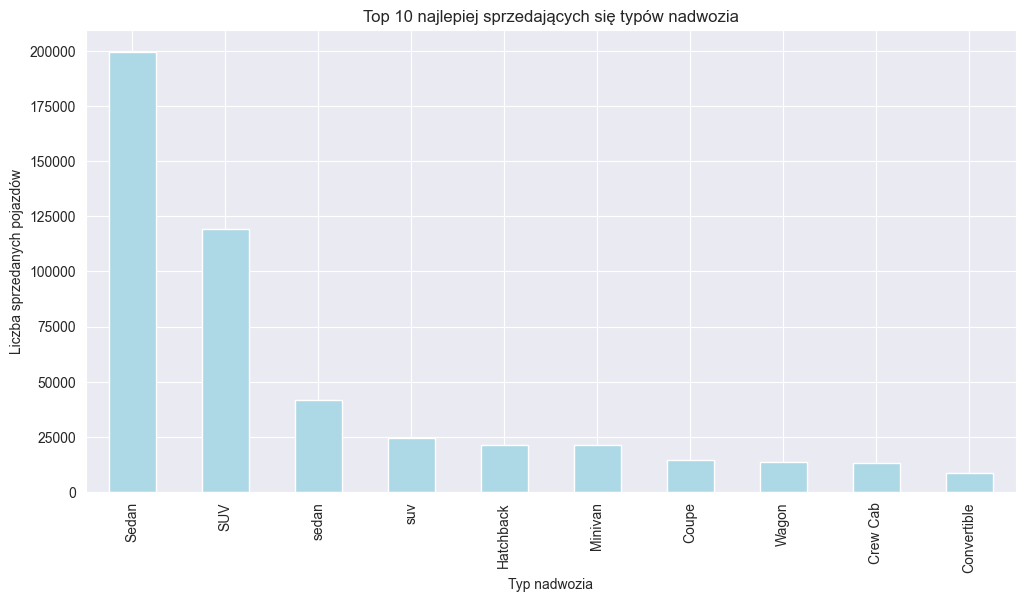

In [120]:
sales_by_body = df.groupby('body')['sellingprice'].count().sort_values(ascending=False).head(10)
print("Top 10 najlepiej sprzedających się typów nadwozia:")
print(sales_by_body)

plt.figure(figsize=(12, 6))
sales_by_body.plot(kind='bar', color='lightblue')
plt.title('Top 10 najlepiej sprzedających się typów nadwozia')
plt.xlabel('Typ nadwozia')
plt.ylabel('Liczba sprzedanych pojazdów')
plt.show()

 Sedan jest zdecydowanie najpopularniejszym typem nadwozia, z liczbą sprzedanych egzemplarzy wyraźnie przewyższającą inne typy. SUV zajmuje drugie miejsce, co świadczy o rosnącej popularności pojazdów tego segmentu. Inne typy nadwozia, takie jak hatchback czy minivan, również znajdują się w czołówce, ale z mniejszą liczbą sprzedanych egzemplarzy.

Top 10 kolorów z największą liczbą sprzedanych pojazdów:
color
black     110970
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222
Name: sellingprice, dtype: int64


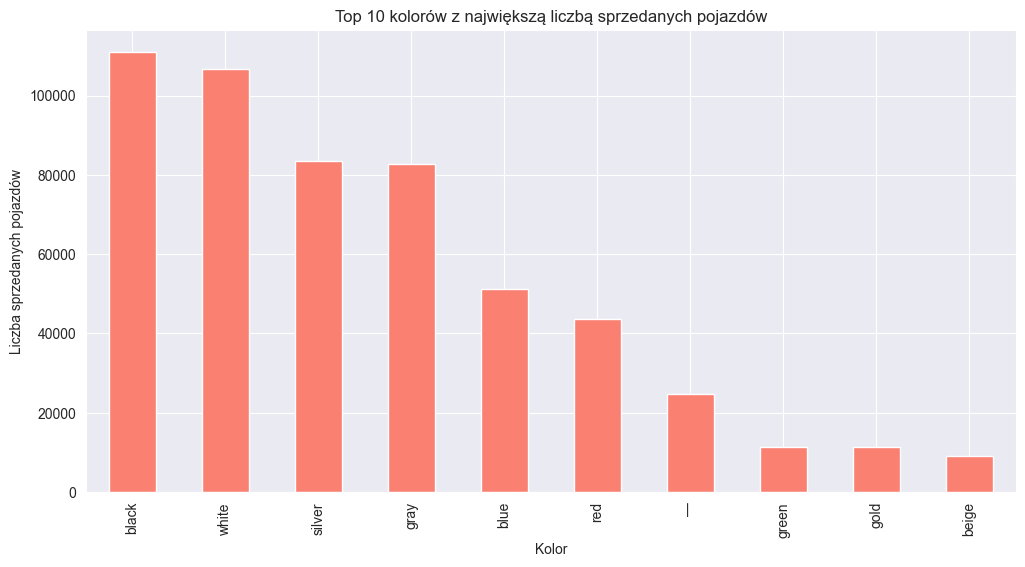

In [121]:
sales_by_color = df.groupby('color')['sellingprice'].count().sort_values(ascending=False).head(10)
print("Top 10 kolorów z największą liczbą sprzedanych pojazdów:")
print(sales_by_color)

# Wizualizacja
plt.figure(figsize=(12, 6))
sales_by_color.plot(kind='bar', color='salmon')
plt.title('Top 10 kolorów z największą liczbą sprzedanych pojazdów')
plt.xlabel('Kolor')
plt.ylabel('Liczba sprzedanych pojazdów')
plt.show()

Kolory takie jak czarny, biały i srebrny są najczęściej wybierane przez nabywców, co nie jest zaskoczeniem, biorąc pod uwagę ich popularność na rynku. Są to kolory neutralne, które zazwyczaj lepiej utrzymują swoją wartość na rynku wtórnym. Inne kolory, takie jak niebieski i czerwony, również znajdują się w top 10, ale w mniejszych ilościach.

### Wstępna wizualizacja danych po usunięciu wierszy z brakującymi wartościami za pomocą metody dropna() 

In [122]:
df_clean = df.dropna()

missing_values2 = df_clean.isnull().sum()

print(missing_values2)

missing_percentage2 = (df_clean.isnull().sum() / len(df_clean)) * 100
print(missing_percentage2)

df_clean.info()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64
year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  ob

In [123]:
nums_without_na_values = df_clean.select_dtypes(exclude=['object'])
nums_without_na_values.describe(percentiles=(.25, .75, .90, .95, .98))

,year,condition,odometer,mmr,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
90%,2014.000000,4.600000,139006.500000,25400.000000,25400.000000
95%,2014.000000,4.800000,165554.250000,30500.000000,30500.000000
98%,2014.000000,4.900000,197697.300000,38100.000000,38200.000000


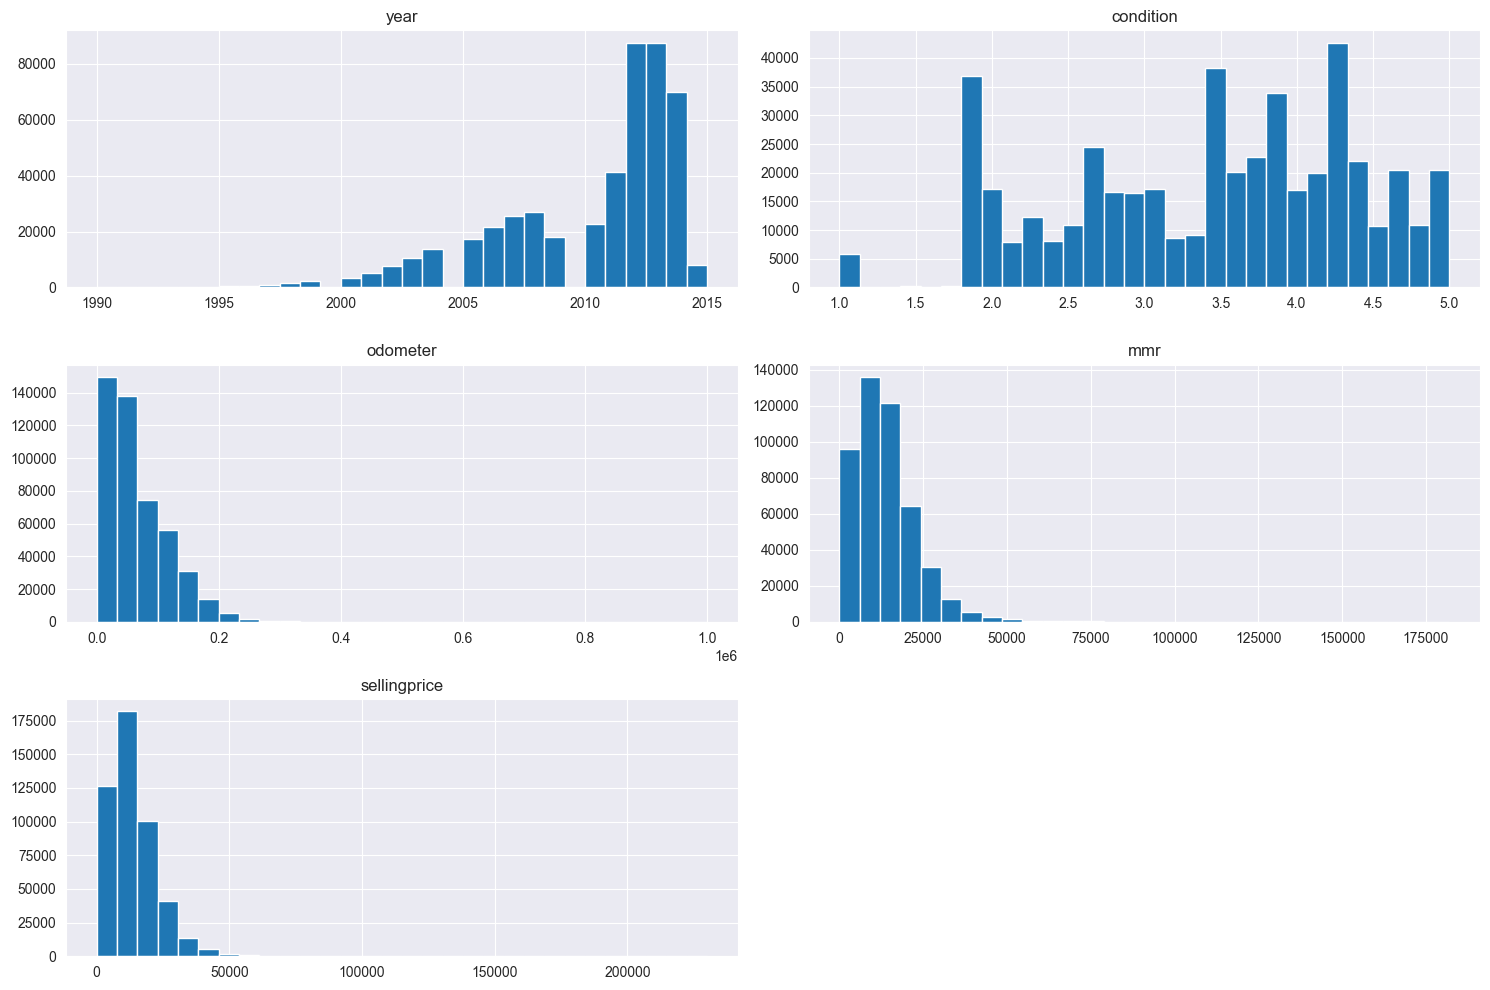

In [124]:
nums_without_na_values.hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

In [125]:
non_nums_without_na_values = df_clean.select_dtypes(include=['object'])
non_nums_without_na_values.describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,472336,472336,472336,472336,472336,472336,472336,472336,472336,472336,472336
unique,53,768,1507,85,2,465779,34,20,17,11927,3609
top,Ford,Altima,Base,Sedan,automatic,5uxfe43579l274932,fl,black,black,"ford motor credit company,llc",Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,81014,16346,48781,174654,455974,4,75243,93245,209870,17756,5004


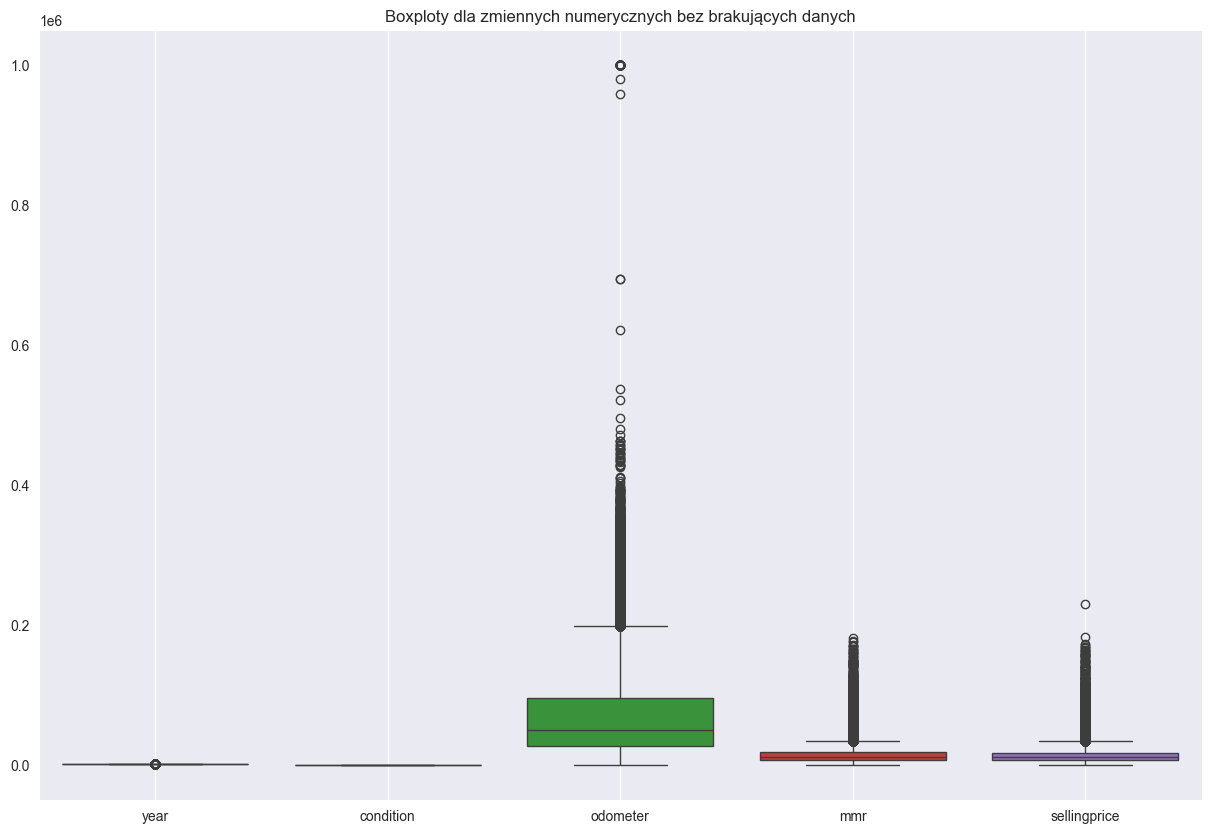

In [126]:
show_boxplot(nums_without_na_values, 'Boxploty dla zmiennych numerycznych bez brakujących danych')

In [127]:
num_columns = ['sellingprice', 'odometer', 'mmr', 'year', 'condition']

# Usuwanie wartości odstających dla każdej zmiennej numerycznej
nums_without_na_values_clean = nums_without_na_values.copy()
for column in num_columns:
    nums_without_na_values_clean = remove_outliers(nums_without_na_values_clean, column)

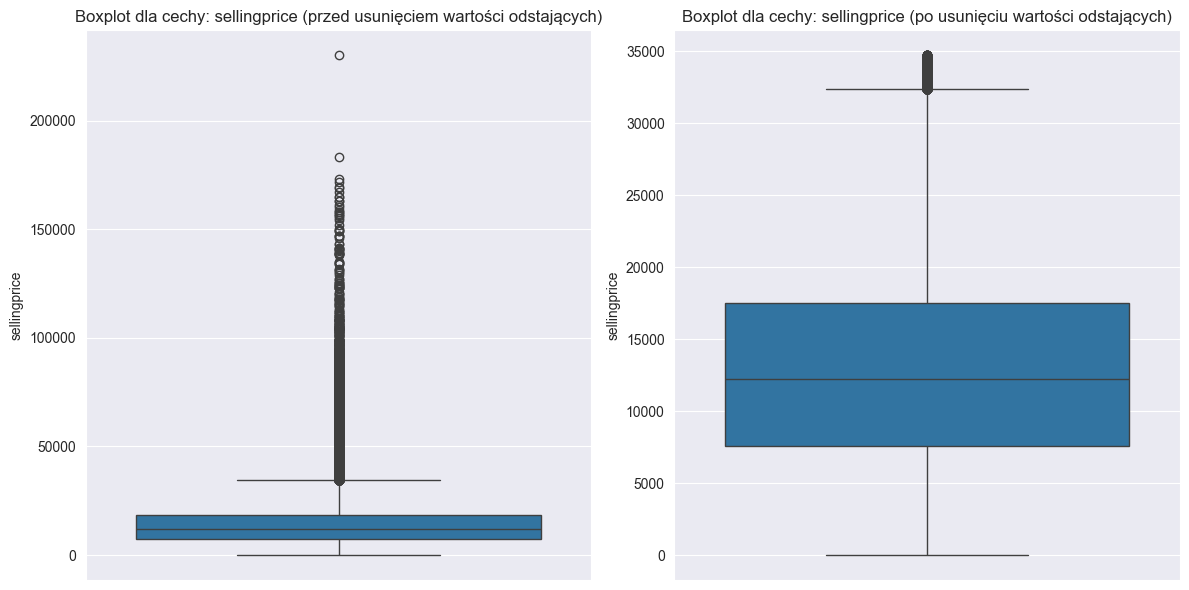

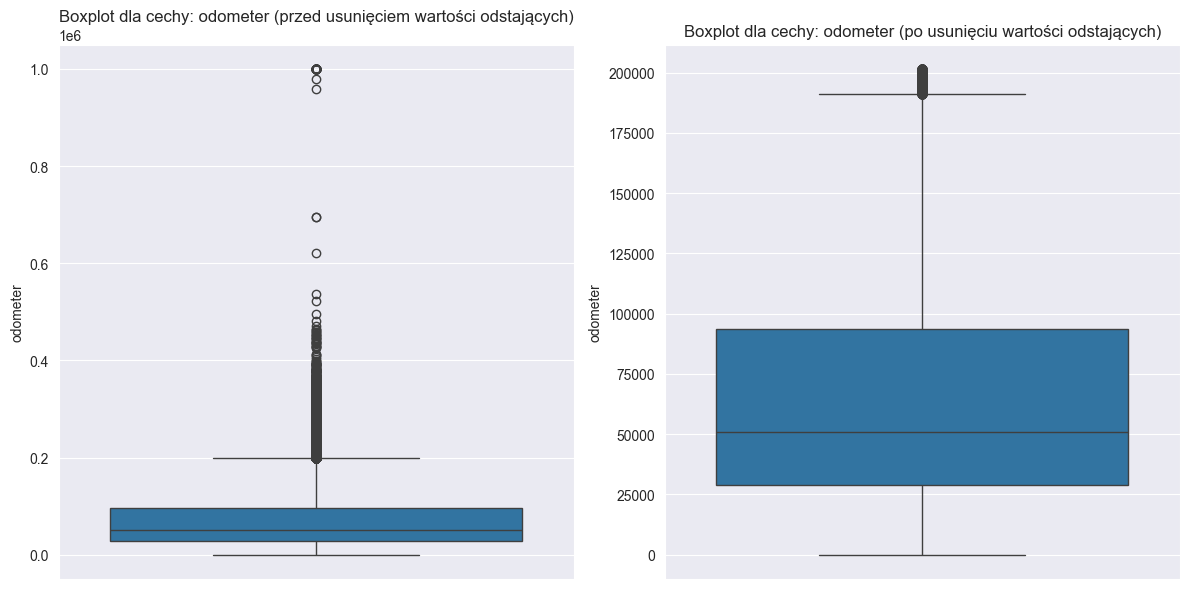

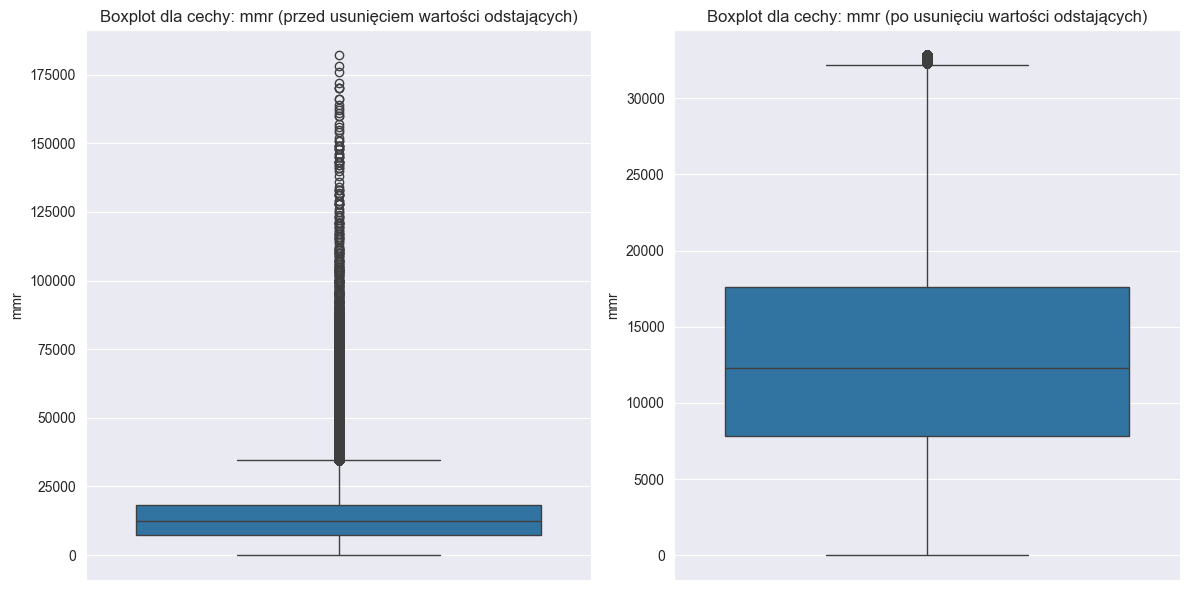

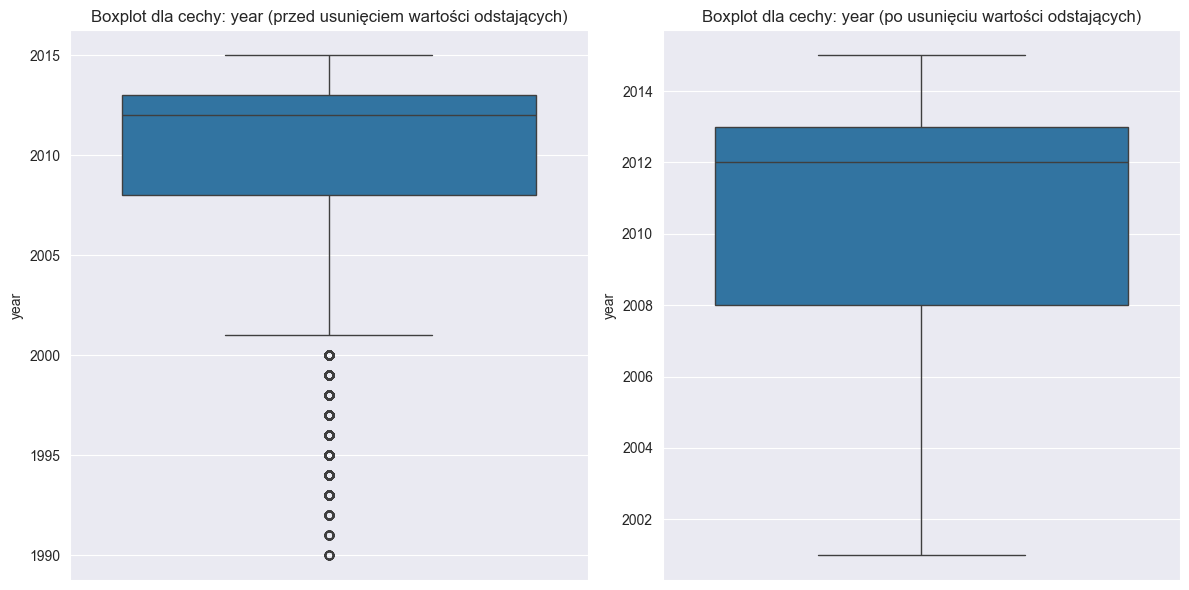

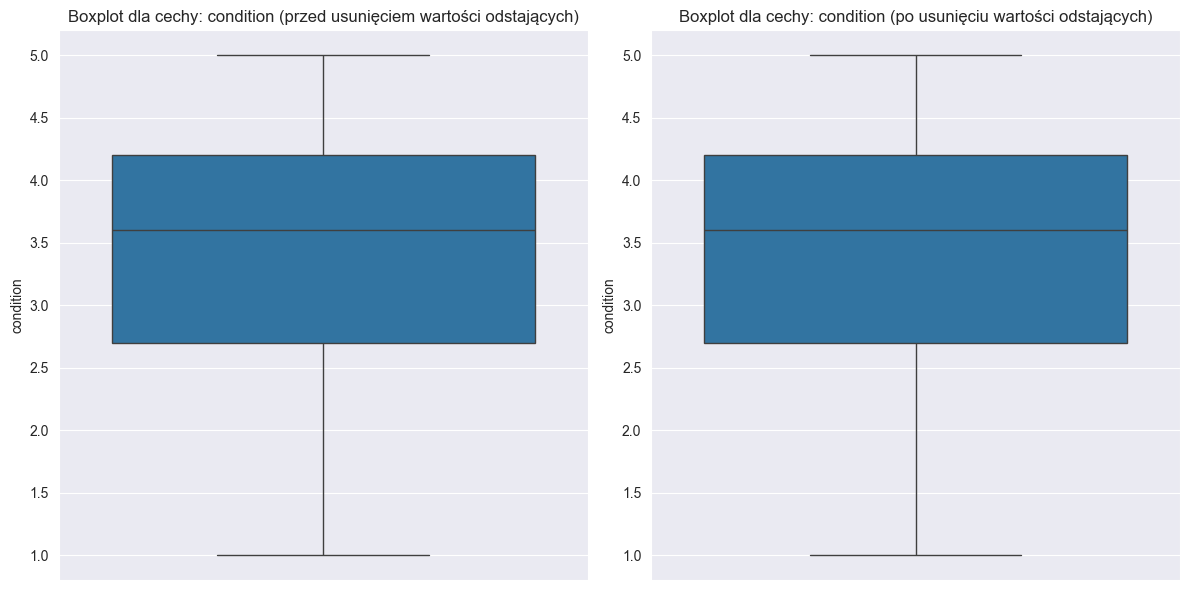

In [128]:
show_separate_boxplot(nums_without_na_values,nums_without_na_values_clean,num_columns)

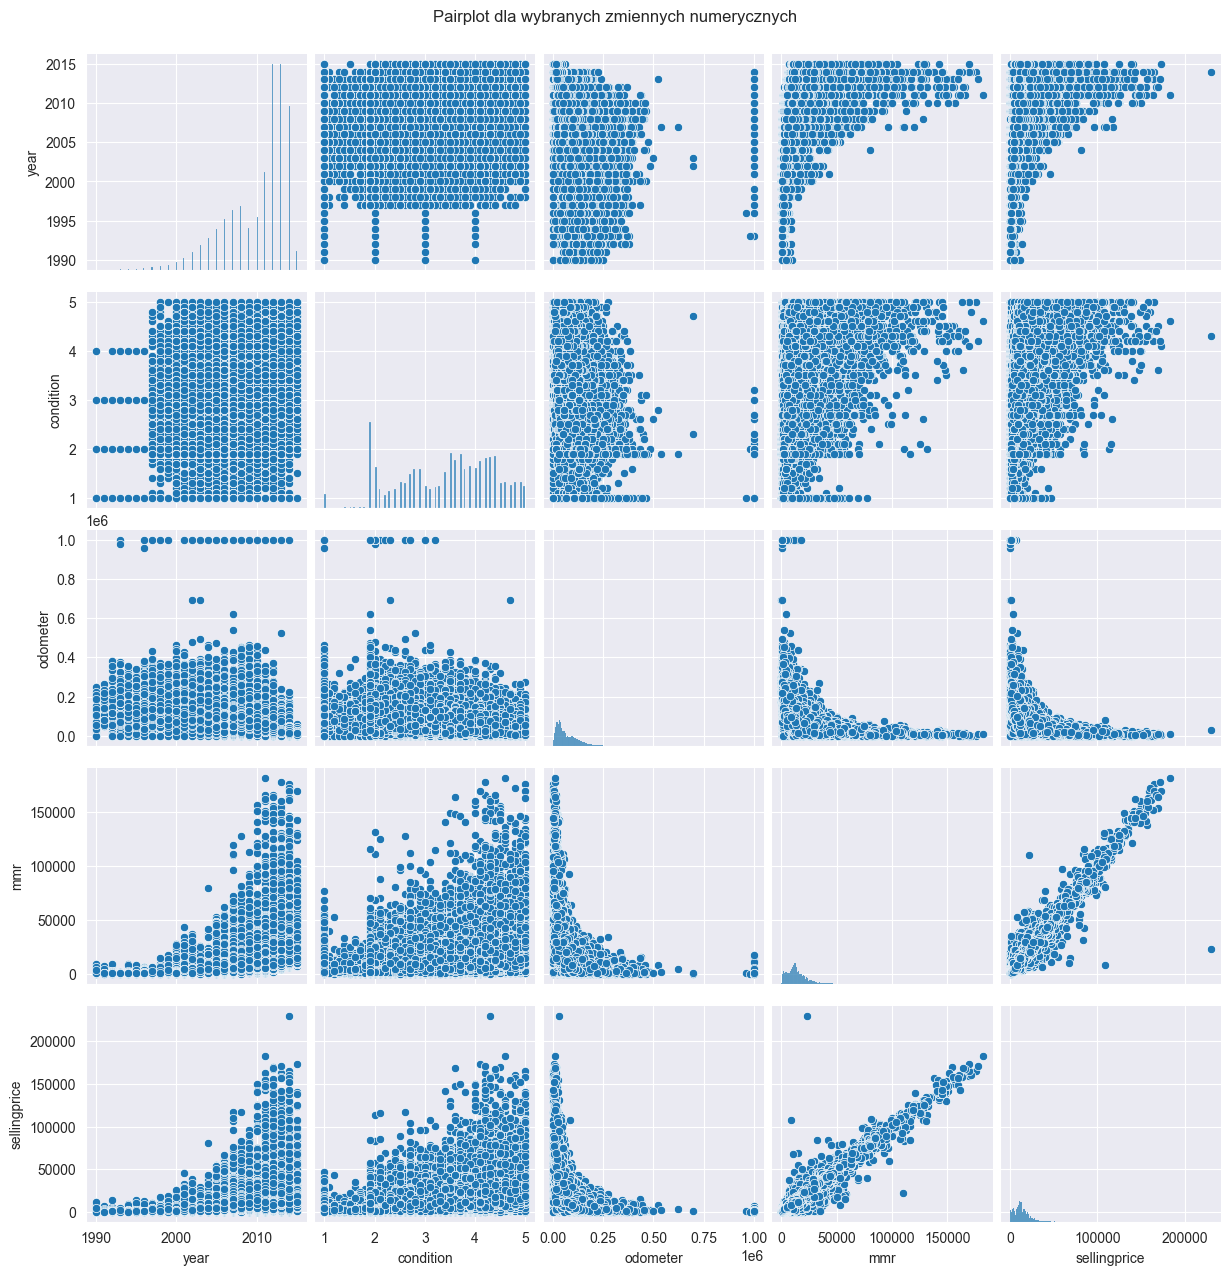

In [129]:
sns.pairplot(nums_without_na_values)
plt.suptitle('Pairplot dla wybranych zmiennych numerycznych', y=1.02)
plt.show()